# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Analysis

### 1.)
The temperature does increase the closer the latitude is to the equator. We can see through both the overall, as well as the northern and southern hemisphere split charts. As the latitude value approaches 0, the temperature becomes consistently higher. This proves the initial hypothesis of the homework to be true in an statistical and easy to digest visual way!

### 2.)
Something that was surprising to me was that humidity % did not have a strong correlation with the latitude. I am unsure why, but I assumed it would at the start of this assignment. But as the graphs show, humidity is not necassarily dictatated by latitude but more likely other factors, perhaps by the amount of water to land mass in an area. This could be why we see such dispersion in our charts.

### 3.)
Both cloudiness and wind speed did not seem to have any correlation with latitude. Wind speed is more a factor of pressure currents which, to my knowledge are not effected by the tilt of the earth. This is likely why temperature is so closely correlated with latitude but the other values tested in this homework are not as much.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Returning size of random selection back to original for hw submission
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

654
['dikson', 'busselton', 'lompoc', 'nikolskoye', 'adavere', 'alofi', 'nalgonda', 'sabang', 'pitanga', 'santiago', 'tekkali', 'paamiut', 'muisne', 'cape town', 'mataura', 'albany', 'labutta', 'taolanaro', 'zittau', 'leningradskiy', 'ushuaia', 'erenhot', 'qaanaaq', 'kushima', 'adrar', 'rafsanjan', 'lillehammer', 'vaini', 'losevo', 'wuwei', 'barentsburg', 'punta arenas', 'morrisburg', 'arraial do cabo', 'port alfred', 'rikitea', 'sokolo', 'torquay', 'ponta do sol', 'amderma', 'nanortalik', 'illoqqortoormiut', 'puerto ayora', 'sorkjosen', 'longyearbyen', 'komsomolskiy', 'parfenyevo', 'togur', 'cidreira', 'hermanus', 'hobyo', 'san quintin', 'port elizabeth', 'halifax', 'aykhal', 'general jose eduvigis diaz', 'sainte-claire', 'gorele', 'oranjemund', 'pemberton', 'buala', 'avarua', 'sao filipe', 'puri', 'kichera', 'ugoofaaru', 'tasiilaq', 'port hawkesbury', 'liepaja', 'mabaruma', 'rock island', 'rebrikha', 'samusu', 'chuy', 'ribeira grande', 'kahului', 'port blair', 'sola', 'finschhafen', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create the base url and query url that will be used for the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Defult is kelvin, so I need to update units to read fahrenheit
units = "imperial"
query_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units

In [5]:
# Perform a GET request
response = requests.get(query_url)

# Convert the response to a JSON
weather_data = response.json()

# To print in a more readable way, use json.dumps with indent and sort_keys
print(json.dumps(weather_data, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 71.0357,
        "lon": 27.8492
    },
    "dt": 1613157825,
    "id": 778707,
    "main": {
        "feels_like": 2.62,
        "humidity": 73,
        "pressure": 1017,
        "temp": 15.62,
        "temp_max": 23,
        "temp_min": 14
    },
    "name": "Mehamn",
    "sys": {
        "country": "NO",
        "id": 1620,
        "sunrise": 1613113700,
        "sunset": 1613137051,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 12.66
    }
}


In [6]:
# Print the city number and name while it is being processed
# I've found that sometimes there is no city ID listed so I added this try logic to ensure the cell runs regardless
try:
    city_num = weather_data["sys"]["id"]
except(KeyError, IndexError):
    city_num = "NA"
city_name = weather_data["name"]
print(f"Currently processing {city_name}, ID Number:{city_num}")

Currently processing Mehamn, ID Number:1620


In [7]:
# Putting everything together into a for loop now to get API request to run the list of cities

# Generate lists that will store the cities data as the loop runs
# Lists developed based on what information the homework requests we gather
city_name_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []

# Variable to track the request process
counter = 0

# Printing the log of cities as they are being requested per homework instructions
print(f"Requesting weather information from {len(cities)} random cities around the world")
print("-----------------------------")


# Set up loop to make an api call on each city in the list and store it's value before moving to the next
for city in cities:    
    
    # Adding a counter to track the processing better
    # I think this is what hw is asking, not city ID, but I will add both to be safe
    counter += 1
    
   # Need try logic for cases where weather api does not have records for that city
    try:
        # Update the query url with a new city
        query_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units
        # Perform a GET request
        response = requests.get(query_url)
        # Convert the response to a JSON
        weather_data = response.json()
        # print(json.dumps(weather_data, indent = 4, sort_keys = True))
   
        # Collect all weather information for that city
        city_num = weather_data["sys"]["id"]
        city_name_list.append(weather_data["name"])
        cloud_list.append(weather_data["clouds"]["all"])
        country_list.append(weather_data["sys"]["country"])
        date_list.append(weather_data["dt"])
        humidity_list.append(weather_data["main"]["humidity"])
        lat_list.append(weather_data["coord"]["lat"])
        lng_list.append(weather_data["coord"]["lon"])
        temp_list.append(weather_data['main']['temp'])
        wind_list.append(weather_data["wind"]["speed"])
    
        # Print that the city is currently being processed per homework instructions
        print(f"{counter} of {len(cities)}: Currently processing {city}, ID Number:{city_num}")
    
    # If city data is not found then use this except command and continue to the next city
    except(KeyError, IndexError):
        print(f"{counter} of {len(cities)}: Unfortunately unable to pull data for {city}, Skipping {city} for now")

    # Adding in a one second sleep interval between queries to avoid exceeding the API query limits
    time.sleep(1)
        
print("-----------------------------")
print(f"Finished collecting weather information from {len(cities)} cities around the world")
    

Requesting weather information from 654 random cities around the world
-----------------------------
1 of 654: Unfortunately unable to pull data for dikson, Skipping dikson for now
2 of 654: Currently processing busselton, ID Number:2020551
3 of 654: Currently processing lompoc, ID Number:4747
4 of 654: Currently processing nikolskoye, ID Number:8926
5 of 654: Currently processing adavere, ID Number:1335
6 of 654: Currently processing alofi, ID Number:7306
7 of 654: Unfortunately unable to pull data for nalgonda, Skipping nalgonda for now
8 of 654: Unfortunately unable to pull data for sabang, Skipping sabang for now
9 of 654: Unfortunately unable to pull data for pitanga, Skipping pitanga for now
10 of 654: Currently processing santiago, ID Number:8506
11 of 654: Unfortunately unable to pull data for tekkali, Skipping tekkali for now
12 of 654: Unfortunately unable to pull data for paamiut, Skipping paamiut for now
13 of 654: Currently processing muisne, ID Number:8550
14 of 654: Curr

114 of 654: Unfortunately unable to pull data for belushya guba, Skipping belushya guba for now
115 of 654: Unfortunately unable to pull data for mongo, Skipping mongo for now
116 of 654: Currently processing bluff, ID Number:2008959
117 of 654: Unfortunately unable to pull data for lisakovsk, Skipping lisakovsk for now
118 of 654: Unfortunately unable to pull data for gamba, Skipping gamba for now
119 of 654: Unfortunately unable to pull data for kutum, Skipping kutum for now
120 of 654: Unfortunately unable to pull data for atuona, Skipping atuona for now
121 of 654: Currently processing yarada, ID Number:9255
122 of 654: Unfortunately unable to pull data for huajuapan, Skipping huajuapan for now
123 of 654: Currently processing ambon, ID Number:9361
124 of 654: Currently processing tuatapere, ID Number:2008959
125 of 654: Currently processing kaeo, ID Number:2012217
126 of 654: Unfortunately unable to pull data for soyo, Skipping soyo for now
127 of 654: Currently processing souilla

228 of 654: Currently processing belmonte, ID Number:8436
229 of 654: Currently processing coquimbo, ID Number:8514
230 of 654: Currently processing east london, ID Number:1912
231 of 654: Unfortunately unable to pull data for vanavara, Skipping vanavara for now
232 of 654: Currently processing ancud, ID Number:8512
233 of 654: Currently processing manicore, ID Number:8397
234 of 654: Unfortunately unable to pull data for louisbourg, Skipping louisbourg for now
235 of 654: Currently processing chekhov, ID Number:9021
236 of 654: Currently processing palmer, ID Number:3598
237 of 654: Currently processing tiarei, ID Number:7318
238 of 654: Unfortunately unable to pull data for liyang, Skipping liyang for now
239 of 654: Unfortunately unable to pull data for grand river south east, Skipping grand river south east for now
240 of 654: Unfortunately unable to pull data for reo, Skipping reo for now
241 of 654: Currently processing shimoda, ID Number:2019346
242 of 654: Currently processing 

340 of 654: Currently processing providencia, ID Number:2011859
341 of 654: Unfortunately unable to pull data for khatanga, Skipping khatanga for now
342 of 654: Currently processing nikel, ID Number:1639
343 of 654: Currently processing lata, ID Number:2016210
344 of 654: Unfortunately unable to pull data for misratah, Skipping misratah for now
345 of 654: Unfortunately unable to pull data for higuey, Skipping higuey for now
346 of 654: Unfortunately unable to pull data for xixiang, Skipping xixiang for now
347 of 654: Unfortunately unable to pull data for warqla, Skipping warqla for now
348 of 654: Unfortunately unable to pull data for borogontsy, Skipping borogontsy for now
349 of 654: Unfortunately unable to pull data for encheng, Skipping encheng for now
350 of 654: Currently processing cabo san lucas, ID Number:7151
351 of 654: Unfortunately unable to pull data for sretensk, Skipping sretensk for now
352 of 654: Unfortunately unable to pull data for saleaula, Skipping saleaula fo

453 of 654: Unfortunately unable to pull data for daru, Skipping daru for now
454 of 654: Unfortunately unable to pull data for contai, Skipping contai for now
455 of 654: Currently processing hamilton, ID Number:4776
456 of 654: Unfortunately unable to pull data for samarai, Skipping samarai for now
457 of 654: Unfortunately unable to pull data for tumannyy, Skipping tumannyy for now
458 of 654: Unfortunately unable to pull data for nam tha, Skipping nam tha for now
459 of 654: Unfortunately unable to pull data for inongo, Skipping inongo for now
460 of 654: Unfortunately unable to pull data for zhangye, Skipping zhangye for now
461 of 654: Currently processing galveston, ID Number:4231
462 of 654: Currently processing tateyama, ID Number:20334
463 of 654: Unfortunately unable to pull data for namuac, Skipping namuac for now
464 of 654: Currently processing alexandria, ID Number:2511
465 of 654: Unfortunately unable to pull data for bokovskaya, Skipping bokovskaya for now
466 of 654: 

563 of 654: Currently processing homer, ID Number:7709
564 of 654: Currently processing torbay, ID Number:998
565 of 654: Unfortunately unable to pull data for tekeli, Skipping tekeli for now
566 of 654: Currently processing baraboo, ID Number:3828
567 of 654: Unfortunately unable to pull data for lucapa, Skipping lucapa for now
568 of 654: Unfortunately unable to pull data for mendi, Skipping mendi for now
569 of 654: Unfortunately unable to pull data for verkhnevilyuysk, Skipping verkhnevilyuysk for now
570 of 654: Unfortunately unable to pull data for chaman, Skipping chaman for now
571 of 654: Currently processing billings, ID Number:3440
572 of 654: Unfortunately unable to pull data for solnechnyy, Skipping solnechnyy for now
573 of 654: Unfortunately unable to pull data for baykit, Skipping baykit for now
574 of 654: Unfortunately unable to pull data for jiuquan, Skipping jiuquan for now
575 of 654: Unfortunately unable to pull data for verkhnyaya inta, Skipping verkhnyaya inta f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Use pandas function pd.DataFrame to create a dataframe from the list information generated above
# I chose to re-arrange this order of the columns here to what I felt more logical
cities_weather_df = pd.DataFrame({"City": city_name_list,
                                  "Country": country_list,
                                  "Temperature (F)": temp_list,
                                  "Date": date_list,
                                  "Humidity %": humidity_list,
                                  "Cloud": cloud_list,
                                  "Wind Speed": wind_list,
                                  "Lat": lat_list,
                                  "Lng":lng_list                                  
                                })

# Display the dataframe
cities_weather_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Busselton,AU,57.24,1613157827,89,0,11.54,-33.6500,115.3333
1,Lompoc,US,54.23,1613157828,62,20,17.27,34.6391,-120.4579
2,Nikolskoye,RU,0.68,1613157829,78,75,6.71,59.7035,30.7861
3,Adavere,EE,6.93,1613157830,85,90,3.44,58.7086,25.8994
4,Alofi,NU,78.80,1613157831,94,99,6.91,-19.0595,-169.9187


In [9]:
# Save city data into a csv file
cities_weather_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Running this cell anyway just to be sure
cleaned_data_df = cities_weather_df[cities_weather_df["Humidity %"] < 100]
cleaned_data_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Busselton,AU,57.24,1613157827,89,0,11.54,-33.6500,115.3333
1,Lompoc,US,54.23,1613157828,62,20,17.27,34.6391,-120.4579
2,Nikolskoye,RU,0.68,1613157829,78,75,6.71,59.7035,30.7861
3,Adavere,EE,6.93,1613157830,85,90,3.44,58.7086,25.8994
4,Alofi,NU,78.80,1613157831,94,99,6.91,-19.0595,-169.9187


In [11]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = cities_weather_df[cities_weather_df["Humidity %"] > 100]

high_humidity_df

high_humidity_index = high_humidity_df.index
high_humidity_index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# The step above created this cleaned dataframe, here it is displayed again
cleaned_data_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Busselton,AU,57.24,1613157827,89,0,11.54,-33.6500,115.3333
1,Lompoc,US,54.23,1613157828,62,20,17.27,34.6391,-120.4579
2,Nikolskoye,RU,0.68,1613157829,78,75,6.71,59.7035,30.7861
3,Adavere,EE,6.93,1613157830,85,90,3.44,58.7086,25.8994
4,Alofi,NU,78.80,1613157831,94,99,6.91,-19.0595,-169.9187


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

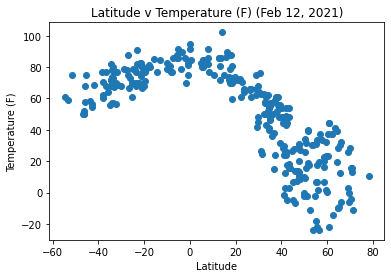

In [13]:
# Create Latitude vs. Temperature scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Temperature (F)"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Temperature (F) (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Temperature (F).png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded.
The data seems to suggest that that the temperature seems to increase as it gets closer to 0 and decrease at varrying rates the further it gets from 0. This relationship supports the initial hypothesis that it gets warmer the closer you are to the equator.

## Latitude vs. Humidity Plot

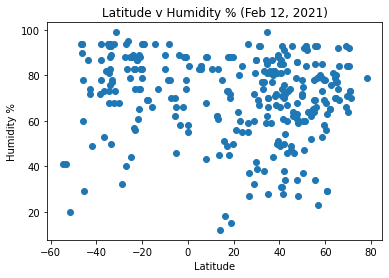

In [14]:
# Create Latitude vs. Humidity scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Humidity %"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Humidity % (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Humidity %.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded.
The data does not show a true correlation between the latitude and the percent humidity. While we do see the humidity values to trend lower at more extreme latitudes (-50, 50) the data is too dispersed in this chart to accurately say there is a strong correlation between the two

## Latitude vs. Cloudiness Plot

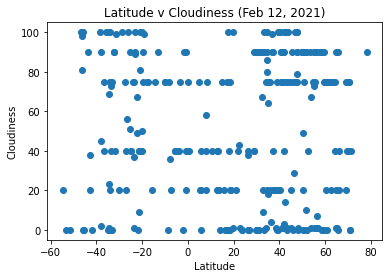

In [15]:
# Create Latitude vs. Cloudiness scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Cloud"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Cloudiness (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Cloudiness.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the Cloudiness value recorded.
The data seems to suggest that that there is little to no discernable coorilation between the level of cloudiness and the latitude, as the points are dispersed across the chart

## Latitude vs. Wind Speed Plot

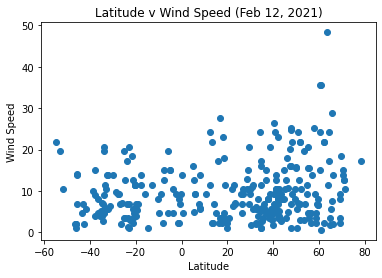

In [16]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Wind Speed"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Wind Speed (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Wind Speed.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the wind speed value recorded.
This chart again depicts little correlation between latitude and wind speed as the data is spread across the whole chart, not being effected by the latitude value it is tied to.

## Linear Regression

In [17]:
# Create Northern and Southern hemisphere dataframes based on homework instructions
# Norther hemisphere is if lat >= 0 and Southern is if it is < 0
northern_hemisphere = cleaned_data_df.loc[cleaned_data_df["Lat"] >= 0]
southern_hemisphere = cleaned_data_df.loc[cleaned_data_df["Lat"] < 0]
northern_hemisphere.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
1,Lompoc,US,54.23,1613157828,62,20,17.27,34.6391,-120.4579
2,Nikolskoye,RU,0.68,1613157829,78,75,6.71,59.7035,30.7861
3,Adavere,EE,6.93,1613157830,85,90,3.44,58.7086,25.8994
6,Muisne,EC,84.20,1613157839,84,40,4.61,0.6000,-80.0333
9,Albany,US,17.80,1613157843,34,100,5.21,42.6001,-73.9662


In [18]:
# Generate x and y values to start
# These will be updated for each chart, but the rest of the setup will stay
x_values = cleaned_data_df["Lat"]
y_values = cleaned_data_df["Temperature (F)"]

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create a line equation using the linregress values generated above
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

0      81.968518
1      40.296140
2      25.000974
3      25.608097
4      73.064889
         ...    
311    41.245544
312    42.569326
313    77.854194
314    73.765621
315    38.275714
Name: Lat, Length: 301, dtype: float64
y = -0.61x + 61.43


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.668247415450981


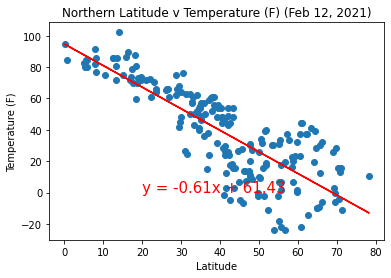

In [19]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature (F)"]

# Generate the scatter plot
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Temperature (F) (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(20,0), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Temperature (F).png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The regression line clearly shows the hypothesis to be true as the temperature drops the further the latitude is from 0 (the equator). Also, the r value being pretty close to 1.0 each time I've run this with new random cities gives me confidence that the correlation between these values is strong.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48916970006894855


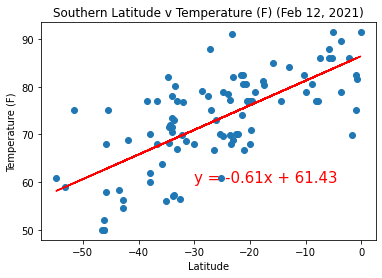

In [20]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature (F)"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Temperature (F) (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-30,60), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Temperature (F).png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The regression line again clearly shows the hypothesis to be true as the temperature rises the closer the latitude gets to 0 (the equator). Also, the r value again is on the 'higher' side as it closer to 1.0, shows that the correlation between these values is strong.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006528231131705123


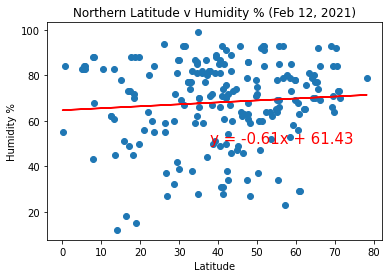

In [21]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity %"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Humidity % (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(38, 50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Humidity %.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded. It also shows a regression line to further display any correlation.
The regression leads me to believe that there is very little correlation between the latitude and the percent humidity. A low r value is a telling sign of this.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.012530614544068232


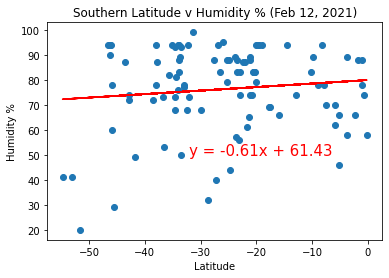

In [22]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity %"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Humidity % (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-32,50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Humidity %.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded. It also shows a regression line to further display any correlation.
While there is a stronger correlation between the latitude and humidity in the southern hemisphere data gathered, the low r value and slope of the regression line indicate that this is still a weak correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01167691752706343


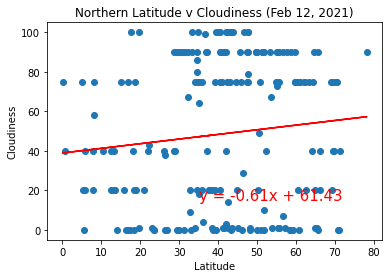

In [23]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloud"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Cloudiness (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(35,15), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Cloudiness.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the cloudiness value recorded. It also shows a regression line to further display any correlation.
There is a positive correlation displayed here, however it is a weak correlation. Leading to the conclusion that the cloudiness and latitude values do not necessarily effect one another.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0007023197607202388


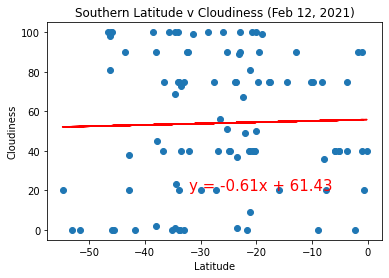

In [24]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloud"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Cloudiness (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-32,20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Cloudiness.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
There is a negative correlation displayed here, however it is a weak correlation. Leading to the conclusion that the cloudiness and latitude values do not necessarily effect one another.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.028877169159122886


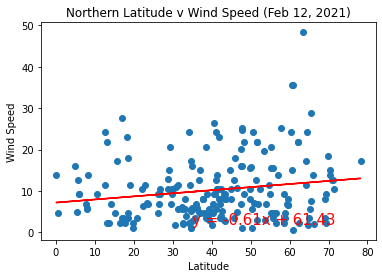

In [25]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Wind Speed (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(35,2), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Wind Speed.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the wind speed value recorded. It also shows a regression line to further display any correlation.
The chart and regression line show that in the northern hemisphere there is a weak, yet slightly positive correlation between the wind speed recorded and the latitude. The r value being very close to 0 is also telling that this correlation is very minimal.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00011009419148971916


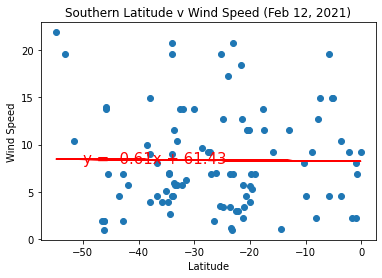

In [26]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Wind Speed (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-50, 8), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Wind Speed.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The chart and regression line show that in the southern hemisphere there is a weak, yet slightly negative correlation between the wind speed recorded and the latitude. The r value being very close to 0 is also telling that this correlation is very minimal.